In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import datetime

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#import xgboost as xgb

# Loading preprocessed dataset

In [3]:
electricity_weather_df = pd.read_csv('../data/preprocessed.csv', parse_dates=True)
electricity_weather_df['time'] = electricity_weather_df['time'].apply(datetime.datetime.fromisoformat)

In [4]:
electricity_weather_df['day'] = [x.day for x in electricity_weather_df['time']]
electricity_weather_df['month'] = [x.month for x in electricity_weather_df['time']]
electricity_weather_df['year'] = [x.year for x in electricity_weather_df['time']]
electricity_weather_df['hour'] = [x.hour for x in electricity_weather_df['time']]

## Training 

In [5]:
features = ['hour','day','month','year','energy','glob_irrad_in_diffuse','enth', 'temp']

In [6]:
electricity_weather_df = electricity_weather_df.set_index('time')
electricity_weather_df = electricity_weather_df[features]

In [7]:
electricity_weather_df.dropna()

,hour,day,month,year,energy,glob_irrad_in_diffuse,enth,temp
time,,,,,,,,
2022-04-24 13:00:00,13,24,4,2022,6207130,285.451531,36.433333,17.333333
2022-04-24 14:00:00,14,24,4,2022,6208145,231.998159,37.560000,18.493750
2022-04-24 15:00:00,15,24,4,2022,6209176,119.028416,33.300000,17.000000
2022-04-24 16:00:00,16,24,4,2022,6210195,101.904795,31.300000,16.950000
2022-04-24 17:00:00,17,24,4,2022,6211198,54.970074,29.800000,16.033333
...,...,...,...,...,...,...,...,...
2022-10-24 07:00:00,7,24,10,2022,11952611,79.074353,30.850000,12.145455
2022-10-24 08:00:00,8,24,10,2022,11954317,150.080133,36.233333,14.475000
2022-10-24 09:00:00,9,24,10,2022,11956203,192.674457,39.585714,15.728571


In [8]:
electricity_weather_df = electricity_weather_df.dropna()

In [9]:
X = electricity_weather_df[features]
Y = electricity_weather_df['energy']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
DecTreeReg= DecisionTreeRegressor()
DecTreeReg.fit(X_train, y_train)

DecisionTreeRegressor()

In [11]:
DTRPred=DecTreeReg.predict(X_test)

Evaluation

Perfomance for test set 1.00


<Figure size 640x480 with 0 Axes>

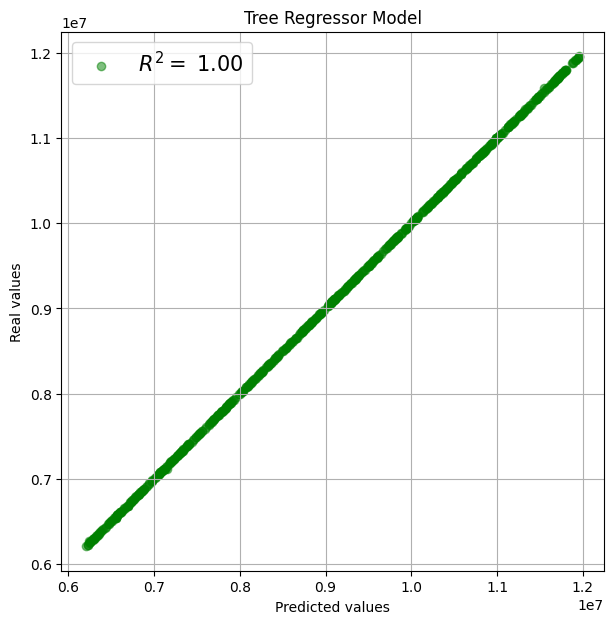

,hour,day,month,year,energy,glob_irrad_in_diffuse,enth,temp,energy_pred,energy_real
time,,,,,,,,,,
2022-06-27 09:00:00,9,27,6,2022,8141202,135.644115,71.364286,29.668182,8152607.0,8141202
2022-04-27 10:00:00,10,27,4,2022,6298778,252.144034,29.533333,11.871429,6295006.0,6298778
2022-07-01 10:00:00,10,1,7,2022,8304091,129.956816,75.360000,31.906667,8306381.0,8304091
2022-05-14 11:00:00,11,14,5,2022,6818914,248.321645,50.322222,22.833333,6817871.0,6818914
2022-08-31 14:00:00,14,31,8,2022,10313727,64.173371,40.600000,18.666667,10303594.0,10313727
...,...,...,...,...,...,...,...,...,...,...
2022-06-15 14:00:00,14,15,6,2022,7794641,148.736601,54.866667,27.014286,7796176.0,7794641
2022-04-28 17:00:00,17,28,4,2022,6341632,50.672565,27.200000,15.600000,6340385.0,6341632
2022-04-27 07:00:00,7,27,4,2022,6293084,78.658212,25.841667,10.016667,6295006.0,6293084


In [12]:

mse = (np.sqrt(mean_squared_error(y_test, DTRPred)))
r2= r2_score(y_test, DTRPred)
mae = mean_absolute_error(y_test, DTRPred)
print("Perfomance for test set {:.2f}".format(r2))
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,DTRPred,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.show()
X_train.describe().T
test_df = X_test

test_df['energy_pred'] = DTRPred
test_df['energy_real'] = y_test
test_df

In [13]:
test_df['energy_pred'] = DTRPred
test_df['energy_real'] = y_test
test_df[:20]

,hour,day,month,year,energy,glob_irrad_in_diffuse,enth,temp,energy_pred,energy_real
time,,,,,,,,,,
2022-06-27 09:00:00,9,27,6,2022,8141202,135.644115,71.364286,29.668182,8152607.0,8141202
2022-04-27 10:00:00,10,27,4,2022,6298778,252.144034,29.533333,11.871429,6295006.0,6298778
2022-07-01 10:00:00,10,1,7,2022,8304091,129.956816,75.360000,31.906667,8306381.0,8304091
2022-05-14 11:00:00,11,14,5,2022,6818914,248.321645,50.322222,22.833333,6817871.0,6818914
2022-08-31 14:00:00,14,31,8,2022,10313727,64.173371,40.600000,18.666667,10303594.0,10313727
2022-09-04 04:00:00,4,4,9,2022,10399438,7.430171,35.100000,14.950000,10400281.0,10399438
2022-08-10 10:00:00,10,10,8,2022,9716617,164.784468,50.330000,25.733333,9714707.0,9716617
2022-10-22 16:00:00,16,22,10,2022,11914505,16.096455,38.088889,14.971429,11913550.0,11914505
2022-06-19 05:00:00,5,19,6,2022,7887872,63.376919,45.554545,19.845455,7886989.0,7887872


In [14]:
test_df['time'] = test_df.index.to_series()

converting actual & predicted data to non-comulative

In [15]:
# test_df['energy_real_lag'] = test_df['energy_real'].shift(1).fillna(0)
# test_df['energy_real_difference'] = test_df['energy_real'] - test_df['energy_real_lag'] 

# test_df['energy_pred_lag'] = test_df['energy_pred'].shift(1).fillna(0)
# test_df['energy_pred_difference'] = test_df['energy_pred'] - test_df['energy_pred_lag'] 
# #removing first row since it is not possible to have non-comulative data for this row
# test_df = test_df[1:]

# #removing first row since it is not possible to have non-comulative data for this row
# test_df = test_df[1:]

## Plotting different days of predicted vs actual data

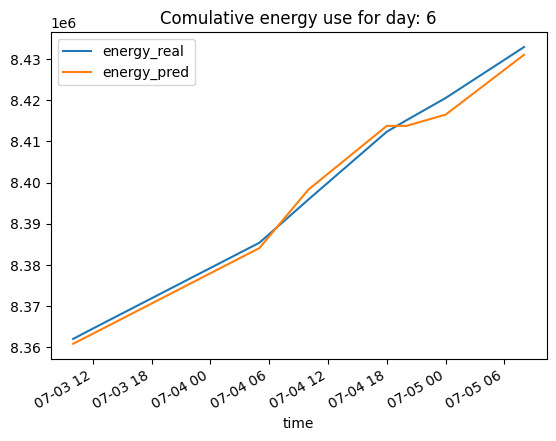

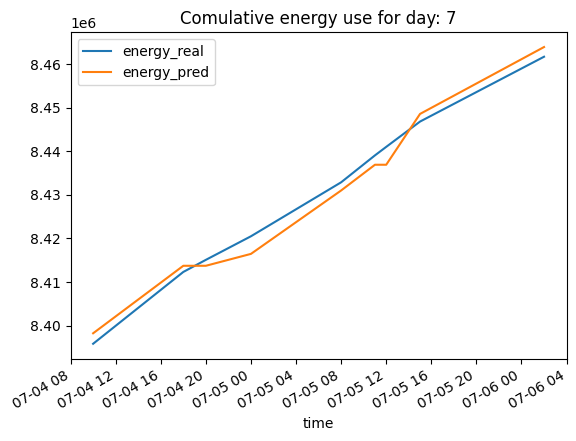

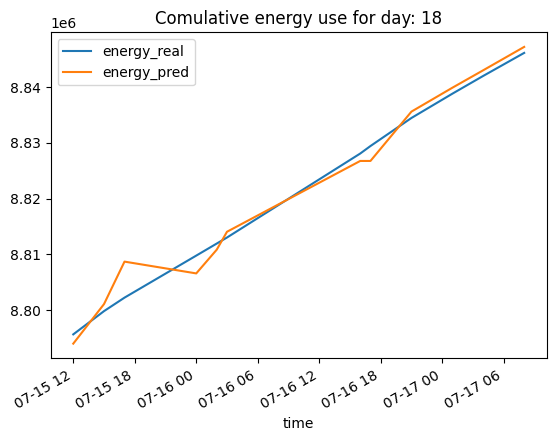

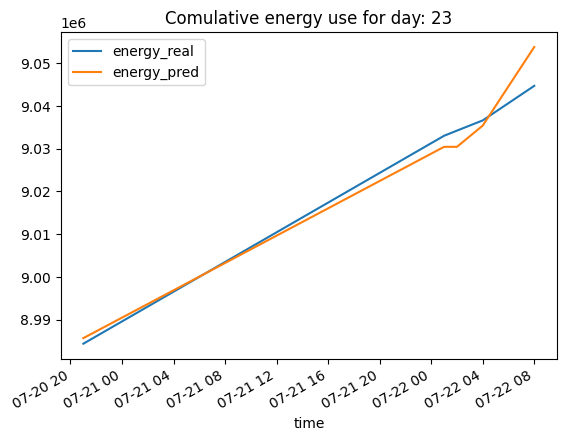

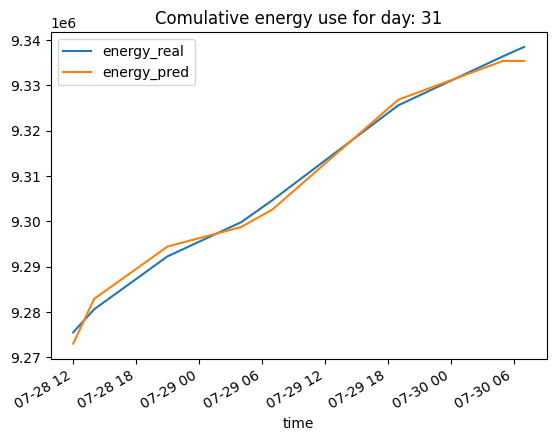

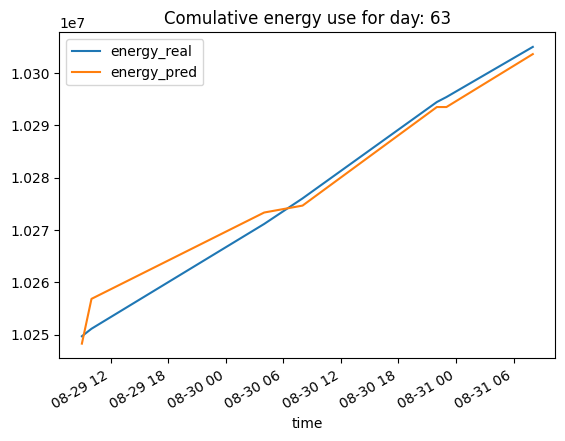

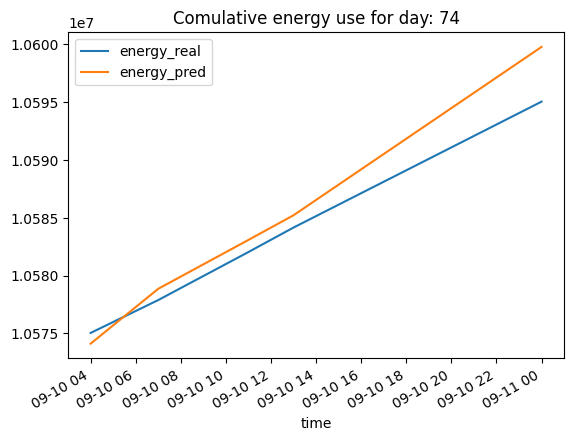

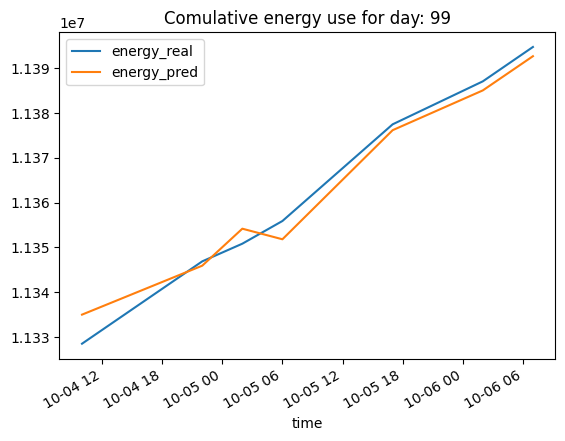

In [22]:
for day_number in [6, 7, 18,23, 31, 63, 74, 99,]:
    day_df = test_df[(test_df['time'] >= (test_df['time'].iloc[0] + datetime.timedelta(days=day_number))) &  (test_df['time'] < (test_df['time'].iloc[0] + datetime.timedelta(days=day_number+2)))]
    fig = day_df.plot(x='time',y=['energy_real','energy_pred'])
    plt.title("Comulative energy use for day: "+ str(day_number))
    plt.savefig('../plots/pred_real_day_number_'+str(day_number)+'.png')